In [1]:
import os
import re
import string
import random
import numpy as np
import pandas as pd
import datetime as datetime
import contractions

from wordcloud import WordCloud
import matplotlib.pyplot as plt

exclude = set(string.punctuation)

In [2]:
# Import libraries
import nltk
import pandas as pd
import string
import random
import re
import io
import contractions

# Import modules from nltk library
import nltk
from nltk.corpus import stopwords
from nltk.corpus import subjectivity,stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.sentiment.util import extract_unigram_feats, mark_negation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords


#For visualizing topic models
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
#Reading the .csv files
appleTweets_df = pd.read_csv("AppleTweets2.csv")

In [5]:
appleTweets_df.columns = [c.replace(' ', '_') for c in appleTweets_df.columns]
appleTweets_df.head(10)

,User,Date_Created,Tweets
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...
5,TheJShield,2023-02-28 23:43:57+00:00,There is nothing more annoying than the static...
6,AppleSupport,2023-02-28 23:38:48+00:00,@_ilas_aiban Thanks for reaching out! \n\nIf t...
7,AppleSupport,2023-02-28 23:36:25+00:00,@krysticoll We have received your DM and will ...
8,A_olawale1,2023-02-28 23:34:11+00:00,@MrRobiiin @AppleSupport Tell the person to lo...
9,Mikeperezc,2023-02-28 23:34:09+00:00,@kunaldudhalkar @Apple @AppleSupport Have they...


In [6]:
appleTweets_df['Cleaned_Tweet']=appleTweets_df.Tweets.map(lambda x : ' '.join([x.lstrip('b')]))

In [7]:
# remove @, URLs, non-alphanumeric characters,rt
appleTweets_df['Cleaned_Tweet']=appleTweets_df.Cleaned_Tweet.map(lambda x :''.join(re.sub("(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')",'',x)).lower())

In [8]:
#Removing the contractions
appleTweets_df['Cleaned_Tweet'] = appleTweets_df['Cleaned_Tweet'].apply(lambda x: contractions.fix(x))

#remove punctuation
appleTweets_df['Cleaned_Tweet'] = appleTweets_df['Cleaned_Tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove short words
appleTweets_df['Cleaned_Tweet'] = appleTweets_df['Cleaned_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 4]))
appleTweets_df['Cleaned_Tweet']

0       iphone trying macro telephoto camera focus dri...
1               thanks tagging happy assist today started
2       better understanding which device beats paired...
3              exactly seeing using clearly problem needs
4                   happening iphone there gather details
                              ...                        
3195                               before cursing bashing
3196                          agree usually usually works
3197                          nightmare sometimes problem
3198                                    generation iphone
3199                                 update weather still
Name: Cleaned_Tweet, Length: 3200, dtype: object

In [9]:
# Tokenize Data
tokenize_tweets = appleTweets_df['Cleaned_Tweet'].apply(lambda x: x.split()) 

#Tokenization.
for i in range(len(tokenize_tweets)):
    tokenize_tweets[i] = ' '.join(tokenize_tweets[i])

appleTweets_df['Cleaned_Tweet'] = tokenize_tweets

In [10]:
# Remove stop words
stop_words = stopwords.words('english')
appleTweets_df['Cleaned_Tweet'] = appleTweets_df['Cleaned_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [11]:
appleTweets_df.head(5)

,User,Date_Created,Tweets,Cleaned_Tweet
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...,iphone trying macro telephoto camera focus dri...
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...,thanks tagging happy assist today started
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...,better understanding device beats paired
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...,exactly seeing using clearly problem needs
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...,happening iphone gather details


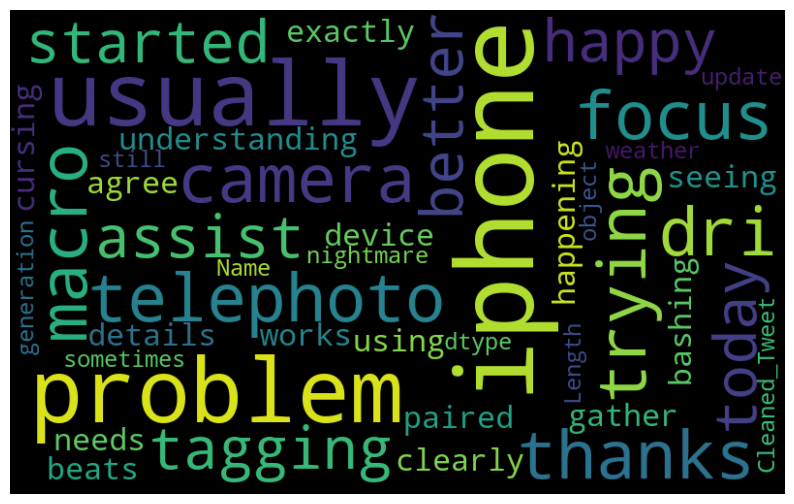

In [12]:
# WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=52, background_color='black',  max_font_size=110).generate(str(appleTweets_df['Cleaned_Tweet'].dropna()))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

VADER Sentiment Analysis

In [13]:
#importing and initialising the VADER analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

scores = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(appleTweets_df['Cleaned_Tweet'].shape[0]):
    compound = analyzer.polarity_scores(appleTweets_df['Cleaned_Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(appleTweets_df['Cleaned_Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(appleTweets_df['Cleaned_Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(appleTweets_df['Cleaned_Tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
appleTweets_df = appleTweets_df.join(sentiments_score)
appleTweets_df

,User,Date_Created,Tweets,Cleaned_Tweet,Compound,Positive,Negative,Neutral
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...,iphone trying macro telephoto camera focus dri...,-0.4019,0.000,0.278,0.722
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...,thanks tagging happy assist today started,0.7650,0.623,0.000,0.377
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...,better understanding device beats paired,0.4404,0.420,0.000,0.580
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...,exactly seeing using clearly problem needs,0.0000,0.287,0.287,0.426
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...,happening iphone gather details,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
3195,AnifridS,2023-03-31 19:31:05+00:00,@HWarlow @AppleSupport Yes that's what I do bu...,cursing bashing,0.0000,0.000,0.000,1.000
3196,HWarlow,2023-03-31 19:25:25+00:00,@AnifridS @AppleSupport It is. I agree. Usual...,agree usually usually works,0.3612,0.455,0.000,0.545
3197,HWarlow,2023-03-31 19:24:13+00:00,@Luminaria98 @AppleSupport Nightmare. I somet...,nightmare sometimes problem,-0.4019,0.000,0.574,0.426
3198,realalexrose,2023-03-31 19:24:01+00:00,"@AppleSupport iPad 10th Generation, iPhone 13 ...",generation iphone,0.0000,0.000,0.000,1.000


In [14]:
# Set type of polarity
polarity = []

for i in range(len(appleTweets_df)):
    if (appleTweets_df['Compound'][i] < 0):
        polarity.append("Negative")
    elif (appleTweets_df['Compound'][i] > 0):
        polarity.append("Positive")
    else:
        polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
appleTweets_df['Polarity'] = polarity
appleTweets_df.head()

,User,Date_Created,Tweets,Cleaned_Tweet,Compound,Positive,Negative,Neutral,Polarity
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...,iphone trying macro telephoto camera focus dri...,-0.4019,0.000,0.278,0.722,Negative
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...,thanks tagging happy assist today started,0.7650,0.623,0.000,0.377,Positive
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...,better understanding device beats paired,0.4404,0.420,0.000,0.580,Positive
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...,exactly seeing using clearly problem needs,0.0000,0.287,0.287,0.426,Neutral
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...,happening iphone gather details,0.0000,0.000,0.000,1.000,Neutral


In [15]:
appleTweets_df['Polarity'].value_counts()

Polarity
Positive    1729
Neutral      947
Negative     524
Name: count, dtype: int64

<Axes: xlabel='Polarity'>

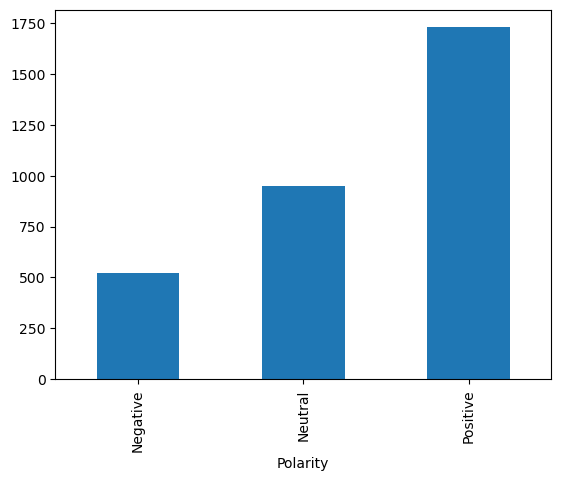

In [16]:
#Data Visualization for the tweets related to Apple Support
appleTweets_df.groupby('Polarity').size().plot(kind='bar')

In [115]:
i= 608
print("Raw tweet : ",appleTweets_df.Tweets[i])
print("\nCleaned tweet : ",appleTweets_df.Cleaned_Tweet[i])
print("\nVADER Polarity scores : ",appleTweets_df.Polarity[i])
print("\nCompound Sentiment : ",appleTweets_df.Compound[i])

Raw tweet :  @_benmattison_ Glad we were able to help out. If you need anything in the future, feel free to contact us again.

Cleaned tweet :  anything future contact

VADER Polarity scores :  Neutral

Compound Sentiment :  0.0


LDA Topic Modelling

In [18]:
#Reading the .csv file
lda_df = pd.read_csv("AppleTweets2.csv")

In [19]:
lda_df['Cleaned_Tweet']=lda_df.Tweets.map(lambda x : ' '.join([x.lstrip('b')]))

In [20]:
# remove @, URLs, non-alphanumeric characters,rt
lda_df['Cleaned_Tweet']=lda_df.Cleaned_Tweet.map(lambda x :''.join(re.sub("(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')",'',x)).lower())

In [21]:
#Removing the contractions
lda_df['Cleaned_Tweet'] = lda_df['Cleaned_Tweet'].apply(lambda x: contractions.fix(x))

#remove punctuation
lda_df['Cleaned_Tweet'] = lda_df['Cleaned_Tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove short words
lda_df['Cleaned_Tweet'] = lda_df['Cleaned_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 4]))
lda_df['Cleaned_Tweet']

0       iphone trying macro telephoto camera focus dri...
1               thanks tagging happy assist today started
2       better understanding which device beats paired...
3              exactly seeing using clearly problem needs
4                   happening iphone there gather details
                              ...                        
3195                               before cursing bashing
3196                          agree usually usually works
3197                          nightmare sometimes problem
3198                                    generation iphone
3199                                 update weather still
Name: Cleaned_Tweet, Length: 3200, dtype: object

In [90]:
# Remove stop words
from gensim.parsing.preprocessing import STOPWORDS
my_stopwords = set(STOPWORDS) - {'apple', 'support','help','hello', 'thank', 'thanks','assist','solution','reply','think','support','welcome','hello','issue'}
lda_df['Cleaned_Tweet'] = lda_df['Cleaned_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [91]:
def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in my_stopwords and len(token) > 4:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token)

In [92]:
lda_df['tokenized_tweet'] = lda_df['Cleaned_Tweet'].apply(tokenize)
lda_df

,User,Date Created,Tweets,Cleaned_Tweet,tokenized_tweet,bi_tri
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...,iphone trying macro telephoto camera focus dri...,"[iphone, trying, macro, telephoto, camera, foc...","[iphone, trying, macro, telephoto, camera, foc..."
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...,thanks tagging happy assist today started,"[thanks, tagging, happy, assist, today, started]","[thanks, tagging, happy, assist, today, started]"
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...,better understanding device beats paired,"[better, understanding, device, beat, paired]","[better_understanding, device, beat, paired]"
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...,exactly seeing using clearly problem needs,"[exactly, seeing, clearly, problem, need]","[exactly, seeing, clearly, problem, need]"
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...,happening iphone gather details,"[happening, iphone, gather, detail]","[happening, iphone, gather, detail]"
...,...,...,...,...,...,...
3195,AnifridS,2023-03-31 19:31:05+00:00,@HWarlow @AppleSupport Yes that's what I do bu...,cursing bashing,"[cursing, bashing]","[cursing, bashing]"
3196,HWarlow,2023-03-31 19:25:25+00:00,@AnifridS @AppleSupport It is. I agree. Usual...,agree usually usually works,"[agree, usually, usually, work]","[agree, usually, usually, work]"
3197,HWarlow,2023-03-31 19:24:13+00:00,@Luminaria98 @AppleSupport Nightmare. I somet...,nightmare sometimes problem,"[nightmare, problem]","[nightmare, problem]"
3198,realalexrose,2023-03-31 19:24:01+00:00,"@AppleSupport iPad 10th Generation, iPhone 13 ...",generation iphone,"[generation, iphone]","[generation, iphone]"


In [93]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Create bigrams
bigram = Phrases(lda_df['tokenized_tweet'], min_count=5, threshold=100)
bigram_phraser = Phraser(bigram)

# Create trigrams
trigram = Phrases(bigram[lda_df['tokenized_tweet']], min_count=5, threshold=100)
trigram_phraser = Phraser(trigram)

# Combine bigrams and trigrams
lda_df['bi_tri'] = [trigram_phraser[bigram_phraser[tweet]] for tweet in lda_df['tokenized_tweet']]

In [94]:
lda_df

,User,Date Created,Tweets,Cleaned_Tweet,tokenized_tweet,bi_tri
0,Stevelee987,2023-02-28 23:58:45+00:00,@AppleSupport any tips to stop my iPhone 13 Pr...,iphone trying macro telephoto camera focus dri...,"[iphone, trying, macro, telephoto, camera, foc...","[iphone, trying, macro, telephoto, camera, foc..."
1,AppleSupport,2023-02-28 23:57:11+00:00,@tejbirbedi Thanks for tagging us! We’d be hap...,thanks tagging happy assist today started,"[thanks, tagging, happy, assist, today, started]","[thanks, tagging, happy, assist, today, started]"
2,AppleSupport,2023-02-28 23:51:56+00:00,@TheJShield We can help look into this with yo...,better understanding device beats paired,"[better, understanding, device, beat, paired]","[better_understanding, device, beat, paired]"
3,theITrebel,2023-02-28 23:48:47+00:00,@samuel_clements @JonesyChris This is exactly ...,exactly seeing using clearly problem needs,"[exactly, seeing, clearly, problem, need]","[exactly, seeing, clearly, problem, need]"
4,AppleSupport,2023-02-28 23:45:55+00:00,@Mikeperezc We can help look into what’s happe...,happening iphone gather details,"[happening, iphone, gather, detail]","[happening, iphone, gather, detail]"
...,...,...,...,...,...,...
3195,AnifridS,2023-03-31 19:31:05+00:00,@HWarlow @AppleSupport Yes that's what I do bu...,cursing bashing,"[cursing, bashing]","[cursing, bashing]"
3196,HWarlow,2023-03-31 19:25:25+00:00,@AnifridS @AppleSupport It is. I agree. Usual...,agree usually usually works,"[agree, usually, usually, work]","[agree, usually, usually, work]"
3197,HWarlow,2023-03-31 19:24:13+00:00,@Luminaria98 @AppleSupport Nightmare. I somet...,nightmare sometimes problem,"[nightmare, problem]","[nightmare, problem]"
3198,realalexrose,2023-03-31 19:24:01+00:00,"@AppleSupport iPad 10th Generation, iPhone 13 ...",generation iphone,"[generation, iphone]","[generation, iphone]"


In [95]:
from gensim.corpora import Dictionary

# Feature selection
tokens = [word for tweet in lda_df['bi_tri'] for word in tweet]
tokens = [t for t in tokens if nltk.pos_tag([t])[0][1] in ['NN', 'NNS','JJ', 'JJR', 'JJS']]
dictionary = Dictionary([tokens])
corpus = [dictionary.doc2bow(tweet) for tweet in lda_df['bi_tri']]

In [96]:
from gensim import corpora, models
# TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [103]:
# LDA model training
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
num_topics = 5
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, random_state=42)

In [104]:
df = pd.DataFrame(columns=[f'Topic {i+1}' for i in range(num_topics)])

# Iterate over each topic and extract the top 30 words
for i in range(num_topics):
    top_words = [word[0] for word in lda_model.show_topic(i, topn=20)]
    df[f'Topic {i+1}'] = top_words

# Print the resulting DataFrame
df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,apple,solution,thank,thanks,support
1,issue,iphone,iphone,issue,continue
2,step,feedback,apple,happy,offer
3,message,happy,phone,version,hello
4,happy,update,device,hello,iphone
5,detail,device,airpods,information,thing
6,device,option,support,continue,issue
7,thanks,issue,assist,gather,community
8,assist,apple,issue,resolution,twitter_english
9,direct,question,happy,reach,message


In [105]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create pyLDAvis visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display visualization
pyLDAvis.display(lda_display)